In [5]:
# Import all required libraries (run this first!)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Optional: for visualization of the tree
from sklearn.tree import plot_tree

# Make plots appear inside the notebook
%matplotlib inline

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [6]:
# Load your CSV file (note the 'r' before the path to handle backslashes)
file_path = r"C:\Users\divye\Downloads\IRIS.csv"
df = pd.read_csv(file_path)

# Show first 10 rows
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
# How many rows and columns?
print("Dataset shape:", df.shape)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# How many samples per species?
print("\nSpecies count:")
print(df['species'].value_counts())

# List unique species names
print("\nUnique species:")
print(df['species'].unique())

Dataset shape: (150, 5)

Missing values per column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Species count:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Unique species:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


<Figure size 1000x800 with 0 Axes>

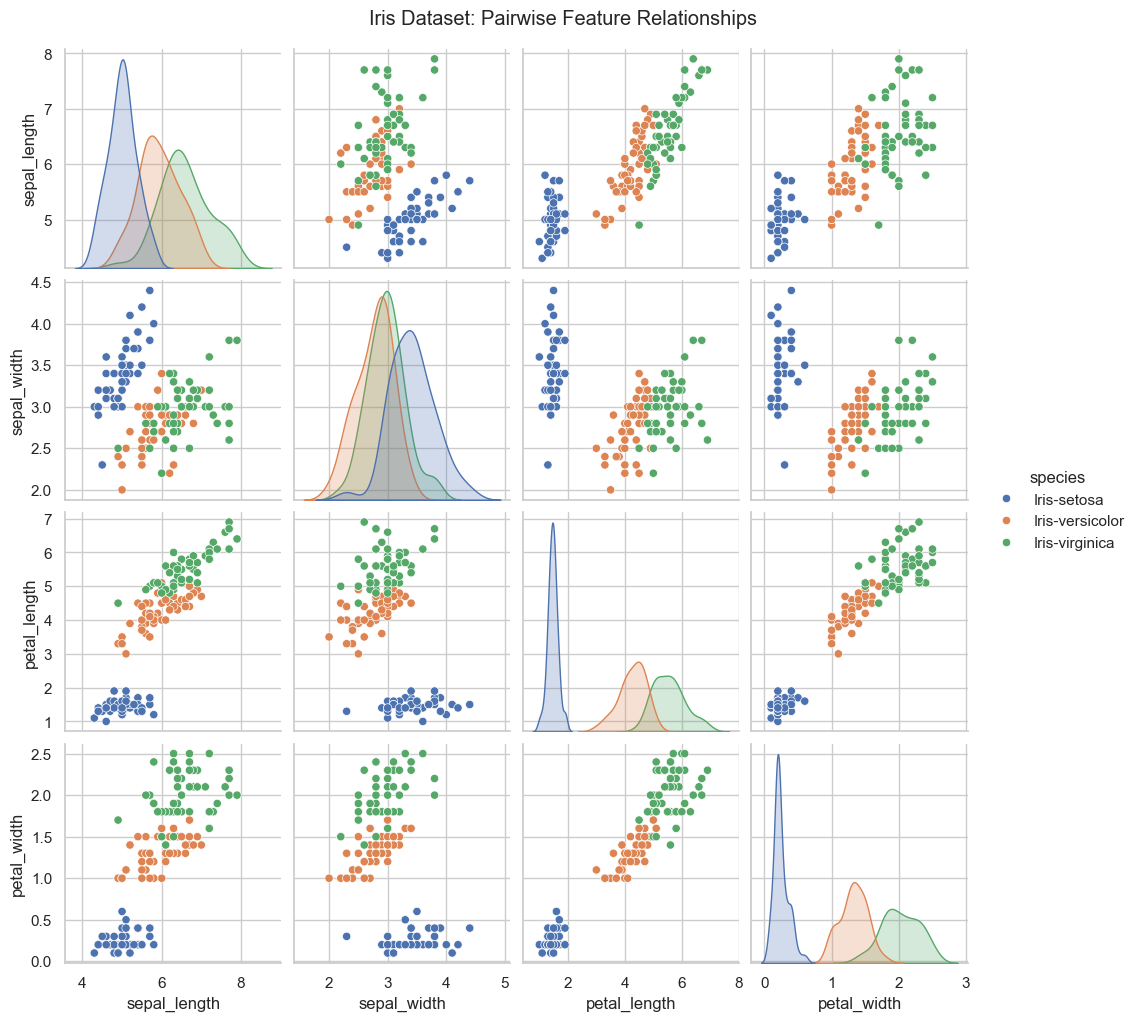

In [8]:
# Set style
sns.set(style="whitegrid")

# Pairplot: shows relationships between all features, colored by species
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='species', height=2.5)
plt.suptitle("Iris Dataset: Pairwise Feature Relationships", y=1.02)
plt.show()

In [9]:
# Features: all columns except 'species'
X = df.drop('species', axis=1)

# Target: the 'species' column
y = df['species']

print("Features (X) shape:", X.shape)   # Should be (150, 4)
print("Target (y) shape:", y.shape)     # Should be (150,)

print("\nFirst 3 feature rows:")
print(X.head(3))

Features (X) shape: (150, 4)
Target (y) shape: (150,)

First 3 feature rows:
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2


In [10]:
# Split: 80% train, 20% test — stratify to keep class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% for testing → 30 samples
    random_state=42,      # For reproducibility
    stratify=y            # Ensures ~10 of each species in test set
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

print("\nTraining set species distribution:")
print(y_train.value_counts())

print("\nTest set species distribution:")
print(y_test.value_counts())

Training set size: 120
Test set size: 30

Training set species distribution:
species
Iris-setosa        40
Iris-virginica     40
Iris-versicolor    40
Name: count, dtype: int64

Test set species distribution:
species
Iris-setosa        10
Iris-virginica     10
Iris-versicolor    10
Name: count, dtype: int64


In [11]:
# Create model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on training data
dt_model.fit(X_train, y_train)

print("✅ Decision Tree trained successfully!")

✅ Decision Tree trained successfully!


In [12]:
# Predict on test set
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)

# Show results
print("🎯 Decision Tree Results")
print("-" * 30)
print(f"Accuracy: {acc_dt:.2f} ({int(acc_dt*100)}%)")

print("\n📝 Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("🧮 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

🎯 Decision Tree Results
------------------------------
Accuracy: 0.93 (93%)

📝 Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

🧮 Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


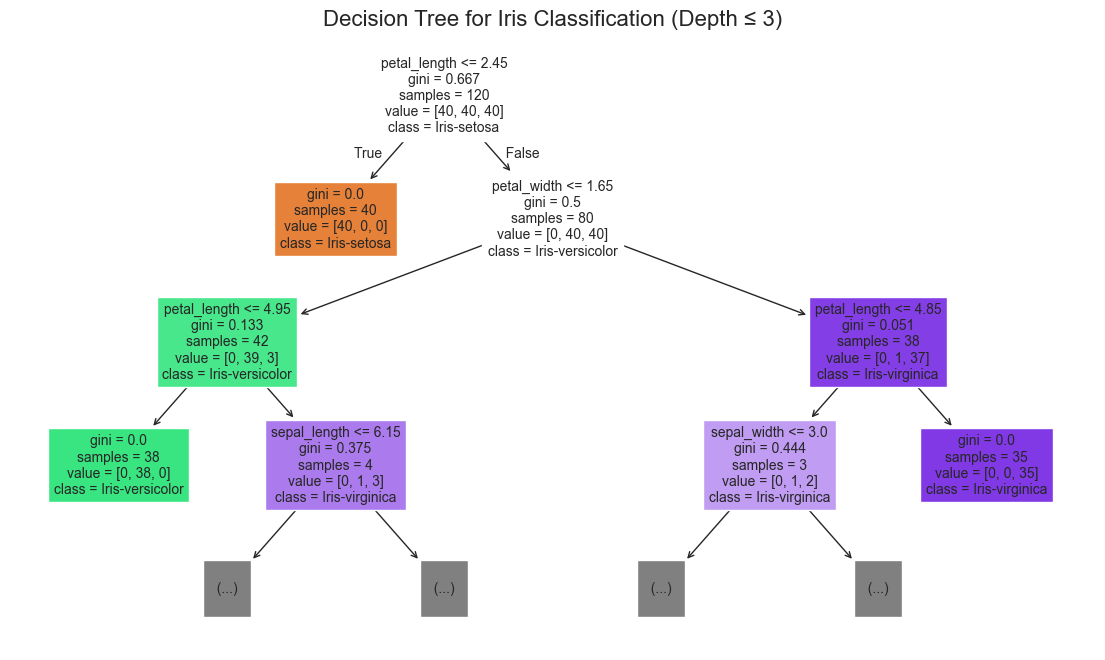

In [13]:
# Plot the tree (simplified — only first few levels for clarity)
plt.figure(figsize=(14, 8))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    filled=True,
    fontsize=10,
    max_depth=3  # Keep it readable
)
plt.title("Decision Tree for Iris Classification (Depth ≤ 3)", fontsize=16)
plt.show()

In [14]:
# Create and train Logistic Regression
lr_model = LogisticRegression(max_iter=200, random_state=42)
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
acc_lr = accuracy_score(y_test, y_pred_lr)

print("🎯 Logistic Regression Results")
print("-" * 35)
print(f"Accuracy: {acc_lr:.2f} ({int(acc_lr*100)}%)")

print("\n📝 Classification Report:")
print(classification_report(y_test, y_pred_lr))

🎯 Logistic Regression Results
-----------------------------------
Accuracy: 0.97 (96%)

📝 Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [15]:
# Example: measurements of a new iris flower
new_flower = [[5.1, 3.5, 1.4, 0.2]]  # Known Iris-setosa

# Predict using Decision Tree
prediction = dt_model.predict(new_flower)
probability = dt_model.predict_proba(new_flower)

print("🌱 New Flower Measurements:")
print(f"  Sepal Length: {new_flower[0][0]}")
print(f"  Sepal Width:  {new_flower[0][1]}")
print(f"  Petal Length: {new_flower[0][2]}")
print(f"  Petal Width:  {new_flower[0][3]}")

print(f"\n🔍 Prediction: {prediction[0]}")

# Show confidence (probabilities for each class)
classes = dt_model.classes_
probs = probability[0]
for i, cls in enumerate(classes):
    print(f"  P({cls}) = {probs[i]:.2%}")

🌱 New Flower Measurements:
  Sepal Length: 5.1
  Sepal Width:  3.5
  Petal Length: 1.4
  Petal Width:  0.2

🔍 Prediction: Iris-setosa
  P(Iris-setosa) = 100.00%
  P(Iris-versicolor) = 0.00%
  P(Iris-virginica) = 0.00%


C:\ProgramData\anaconda3\envs\iris\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\envs\iris\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [16]:
import joblib

# Save the trained Decision Tree
joblib.dump(dt_model, 'iris_decision_tree.pkl')

print("✅ Model saved as 'iris_decision_tree.pkl' in current folder.")
print("📁 To load later: model = joblib.load('iris_decision_tree.pkl')")

✅ Model saved as 'iris_decision_tree.pkl' in current folder.
📁 To load later: model = joblib.load('iris_decision_tree.pkl')
